[1] 10.50928

[1] 9.689942

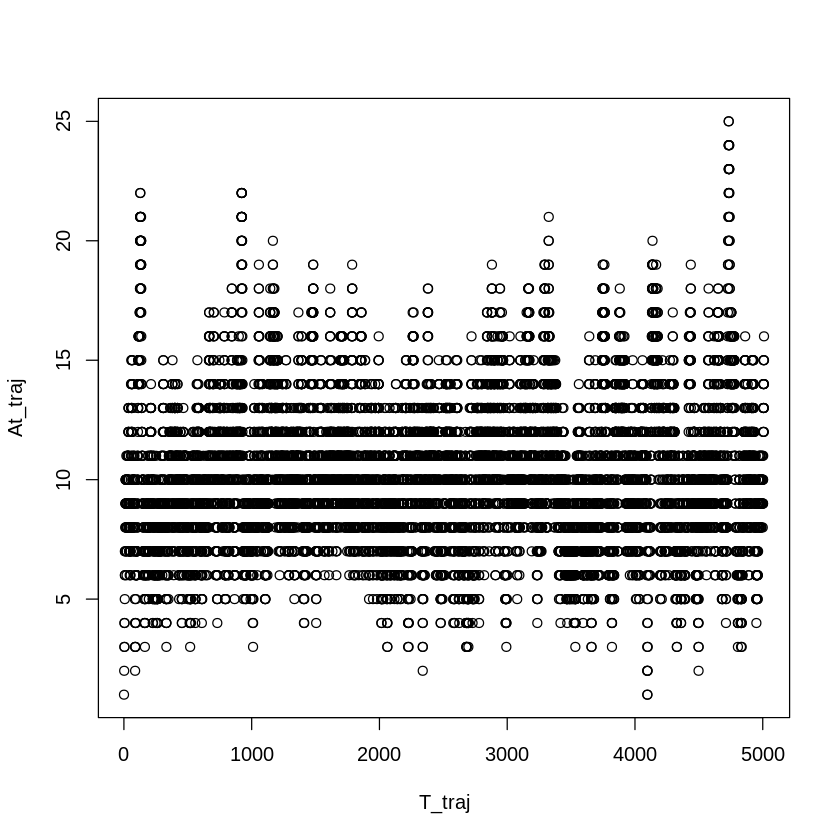

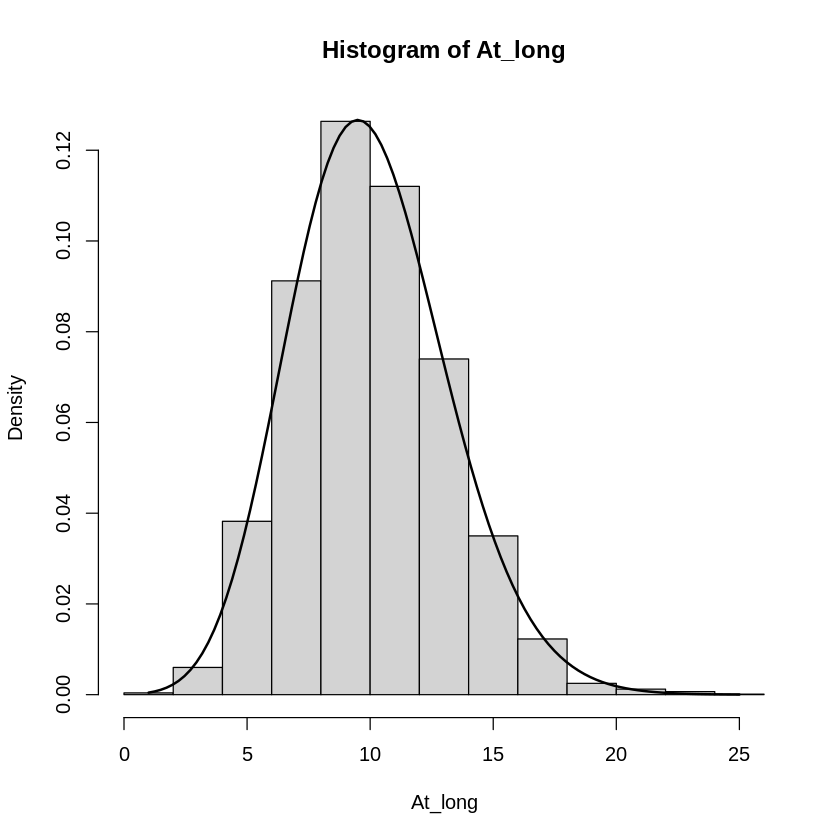

In [1]:
# Demonstration of the Gillespie algorithm for a simple production degradation
# model of transcription.

# Production rate (per second)
k2 <- 1.0

# Degradation rate (per molecule per second)
k1 <- 0.1

# Initial number of molecules of species A, at T=0
At <- 0

# Stored trajectory of At values
At_traj <- c()

# Initial time
T <- 0.0

# Stored trajectories of times of reactions
T_traj <- c()

# Number of iterations to run
iter <- 10000


for (i in c(1:iter)) {

   # Find out waiting time to the next reaction
   r1 <- runif(1, min = 0, max = 1)    # generate the first uniformly distributed random number
   ktotal <- At*k1 + k2                # total current rate, which depends on number of A molecules
   T_wait <- (1/ktotal)*log(1/r1)      # T_wait is an exponentially distributed random number with rate ktotal
   T <- T + T_wait                     # Time when the next reaction will occur

   # Find out which reaction will occur
   r2 <- runif(1, min = 0, max = 1)    # generate the second uniformly distributed random number
   if (r2 < k2/ktotal) {
     At <- At + 1                      # production
   } else {
     At <- At - 1                      # degradation
   }

   # store the current value of A and time of reaction
   At_traj <- append(At_traj, At)
   T_traj <- append(T_traj, T)

}                                      # ends for loop over i

# Plot the A versus time trajectory.
plot(T_traj,At_traj)


# Long time limit of the distribution of A (trajectories should be longer than 10000 steps)
At_long <- At_traj[1000:iter]
mean(At_long)
var(At_long)

# Create histogram of long time data and match with Poisson distribution
hist(At_long, freq = FALSE)
x_values <- seq(min(At_long), max(At_long), length = 100)
y_values <- (1/factorial(x_values))*(k2/k1)^x_values*exp(-k2/k1)
lines(x_values, y_values, lwd = 2)




In [2]:

for (i in c(1:iter)) {

   # Find out waiting time to the next reaction
   r1 <- runif(1, min = 0, max = 1)    # generate the first uniformly distributed random number
   ktotal <- At*k1 + k2                # total current rate, which depends on number of A molecules
   T_wait <- (1/ktotal)*log(1/r1)      # T_wait is an exponentially distributed random number with rate ktotal
   T <- T + T_wait                     # Time when the next reaction will occur

   # Find out which reaction will occur
   r2 <- runif(1, min = 0, max = 1)    # generate the second uniformly distributed random number
   if (r2 < k2/ktotal) {
     At <- At + 1                      # production
   } else {
     At <- At - 1                      # degradation
   }

   # store the current value of A and time of reaction
   At_traj <- append(At_traj, At)
   T_traj <- append(T_traj, T)

}                                      # ends for loop over i

